In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# load CSV file and create a text blob
import csv
def load_csv_column_as_text_blob(fileName, columnName=None):
    text = ""
    with open(fileName, newline='', encoding='utf-8-sig') as inF:
        reader = csv.DictReader(inF)
        for row in reader:
            if not columnName:
                for key, value in row.items():
                    columnName = key
                    break
            text = text+row[columnName]
    # print("{}".format(text))
    return text

In [3]:
# compute term frrequencies in the text
def vectorize_text(text, stopWords='english'):
    tf_vectorizer = CountVectorizer(stop_words=stopWords)
    tf = tf_vectorizer.fit_transform([text])
    # get the list of terms (words) used in data
    words = np.array(tf_vectorizer.get_feature_names())
    
    return tf, words

In [4]:
def get_word_frequencies(text):
    # return word frequencies as a dictionary
    
    tf, words = vectorize_text(text)
    # convert sparse matrix to an array
    tf_mat = tf.toarray()
    
    # get the list of words from tf
    text_words = words[(tf_mat>0)[0]]
    # get the count of the words from tf
    word_counts = tf_mat[tf_mat>0]
    # zip words and counts, and then convert it to a dictionary
    word_frequencies = dict(zip(text_words, word_counts))
    
    return word_frequencies

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def create_word_cloud(text, saveToPath="./countvect_wordcloud.png"):
    frequencies = get_word_frequencies(text)
    wordcloud = WordCloud(background_color='white').fit_words(frequencies)
    
    fig, ax = plt.subplots(figsize=(15,15))
    _ = ax.imshow(wordcloud, interpolation='bilinear')
    _ = ax.axis("off")
    fig.savefig(saveToPath, bbox_inches = 'tight', pad_inches = 0)

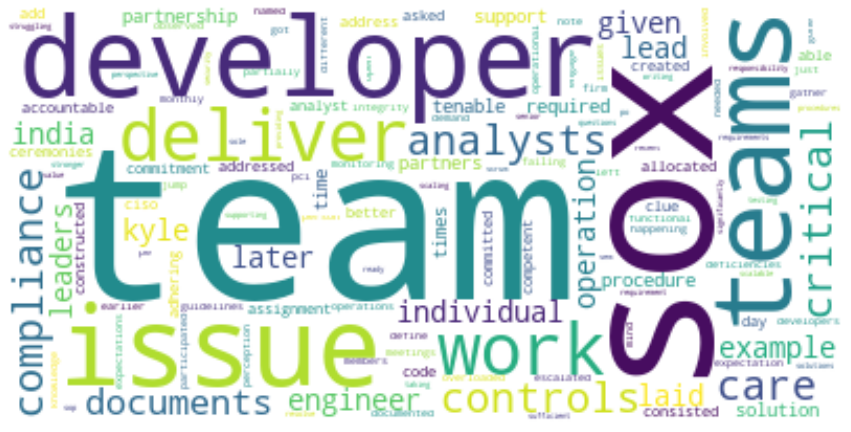

In [6]:
text = load_csv_column_as_text_blob("confidence_text.csv")
create_word_cloud(text, "./modular_wordcloud.png")